In [1]:
"""This file contains all the classes you must complete for this project.

You can use the test cases in agent_test.py to help during development, and
augment the test suite with your own test cases to further test your code.

You must test your agent's strength against a set of agents with known
relative strength using tournament.py and include the results in your report.
"""
import random, math

class Timeout(Exception):
    """Subclass base exception for code clarity."""
    pass

# define different heuristics functions
def heuristic_simple_weighted(game, player):
    """
    This evaluation function outputs a score equal to the difference 
    in the number of moves available to the two players weighted to the 
    number of empty spaces:
    (own_moves - opponent moves ) / (num empty spaces + 1):
    """ 
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")
    # count avaliable legal moves for each player
    own_moves = float(len(game.get_legal_moves(player)))
    opp_moves = float(len(game.get_legal_moves(game.get_opponent(player))))
    # count empty spaces on the board
    empty_spaces = len(game.get_blank_spaces())
    return (own_moves - opp_moves) / (empty_spaces + 1.0)

def heuristic_simple_weighted_inv(game, player):
    """
    This evaluation function outputs a score equal to the difference 
    in the number of moves available to the two players weighted to the 
    inverse number of empty spaces:
    (own_moves - opponent moves ) * (num empty spaces + 1):
    """ 
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")
    # count avaliable legal moves for each player
    own_moves = float(len(game.get_legal_moves(player)))
    opp_moves = float(len(game.get_legal_moves(game.get_opponent(player))))
    # count empty spaces on the board
    empty_spaces = len(game.get_blank_spaces())
    return (own_moves - opp_moves) * (empty_spaces + 1.0)
    
def heuristics_offensive(game, player):
    """
    This evaluation function discussed in lecture that outputs a
    score equal to the difference in the number of moves available to 
    active player and double of avaliable moves to the opponent player:
    (own_moves - 2 * opponent moves)  
    """
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")    
    # count avaliable legal moves for each player
    own_moves = float(len(game.get_legal_moves(player)))
    opp_moves = float(len(game.get_legal_moves(game.get_opponent(player))))
    return own_moves - 2 * opp_moves

def heuristics_offensive_weighted(game, player):
    """
    This evaluation function outputs a score equal to the difference in 
    the number of moves available to active player and double of available 
    moves to the opponent player weighted to the number of empty spaces:
    (own_moves - 2 * opponent moves ) / (num empty spaces + 1.)
    """
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")    
    # count avaliable legal moves for each player
    own_moves = float(len(game.get_legal_moves(player)))
    opp_moves = float(len(game.get_legal_moves(game.get_opponent(player))))
    # count empty spaces on the board
    empty_spaces = len(game.get_blank_spaces())
    return (own_moves - 2 * opp_moves) / (empty_spaces + 1.0)

def heuristics_offensive_weighted_inv(game, player):
    """
    This evaluation function outputs a score equal to the difference in 
    the number of moves available to active player and double of available 
    moves to the opponent player weighted to the inverse number of empty spaces:
    (own_moves - 2 * opponent moves ) * (num empty spaces + 1.)
    """
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")    
    # count avaliable legal moves for each player
    own_moves = float(len(game.get_legal_moves(player)))
    opp_moves = float(len(game.get_legal_moves(game.get_opponent(player))))
    # count empty spaces on the board
    empty_spaces = len(game.get_blank_spaces())
    return (own_moves - 2 * opp_moves) * (empty_spaces + 1.0)

def heuristics_proximity_min(game, player):
    """ 
    This evaluation function minimizing Euclidian distance between players 
    and outputs a score equal to the inverse of the Euclidian distance:
    1. / sqrt((x2 - x1)^2c+ (y2 - y1)^2)
    
    """
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")    
    # get coordinates
    own_loc = game.get_player_location(player)
    opp_loc = game.get_player_location(game.get_opponent(player))
    # calculate Euclidian distance
    euclidian_dist = float(math.sqrt((opp_loc[0]-own_loc[0])**2+(opp_loc[1]-own_loc[1])**2))
    return 1. / euclidian_dist

def heuristics_proximity_min_weighted(game, player):
    """ 
    This evaluation function minimizing Euclidian distance between players 
    and outputs a score equal to the inverse of the Euclidian distance 
    weighted by empty spaces:
    1.0 / ((num empty spaces + 1.) * sqrt((x2 - x1)^2 + (y2 - y1)^2))
    
    """
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")    
    # get coordinates
    own_loc = game.get_player_location(player)
    opp_loc = game.get_player_location(game.get_opponent(player))
    # calculate Euclidian distance
    euclidian_dist = float(math.sqrt((opp_loc[0]-own_loc[0])**2+(opp_loc[1]-own_loc[1])**2))
    # count empty spaces on the board
    empty_spaces = len(game.get_blank_spaces())
    return 1. / (euclidian_dist * (empty_spaces + 1.))

def heuristics_proximity_min_weighted_inv(game, player):
    """ 
    This evaluation function minimizing Euclidian distance between players 
    and outputs a score equal to the inverse of the Euclidian distance 
    weighted by inverse of empty spaces:
    (num empty spaces + 1.) / sqrt((x2 - x1)^2 + (y2 - y1)^2)
    
    """
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")    
    # get coordinates
    own_loc = game.get_player_location(player)
    opp_loc = game.get_player_location(game.get_opponent(player))
    # calculate Euclidian distance
    euclidian_dist = float(math.sqrt((opp_loc[0]-own_loc[0])**2+(opp_loc[1]-own_loc[1])**2))
    # count empty spaces on the board
    empty_spaces = len(game.get_blank_spaces())
    return (empty_spaces + 1.) / euclidian_dist

def heuristics_proximity_max(game, player):
    """ 
    This evaluation function maximizing Euclidian distance between players 
    and outputs a score equal to the Euclidian distance:
    sqrt((x2 - x1)^2 + (y2 - y1)^2)
    
    """
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")    
    # get coordinates
    own_loc = game.get_player_location(player)
    opp_loc = game.get_player_location(game.get_opponent(player))
    # calculate Euclidian distance
    euclidian_dist = float(math.sqrt((opp_loc[0]-own_loc[0])**2+(opp_loc[1]-own_loc[1])**2))
    return euclidian_dist

def heuristics_proximity_max_weighted(game, player):
    """ 
    This evaluation function maximizing Euclidian distance between players 
    and outputs a score equal to the Euclidian distance weighted by 
    of empty spaces:
    sqrt((x2 - x1)^2 + (y2 - y1)^2) / (num empty spaces + 1.)
    
    """
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")    
    # get coordinates
    own_loc = game.get_player_location(player)
    opp_loc = game.get_player_location(game.get_opponent(player))
    # calculate Euclidian distance
    euclidian_dist = float(math.sqrt((opp_loc[0]-own_loc[0])**2+(opp_loc[1]-own_loc[1])**2))
    # count empty spaces on the board
    empty_spaces = len(game.get_blank_spaces())
    return euclidian_dist / (empty_spaces + 1)

def heuristics_proximity_max_weighted_inv(game, player):
    """ 
    This evaluation function maximizing Euclidian distance between players 
    and outputs a score equal to the Euclidian distance weighted by inverse
    of empty spaces:
    sqrt((x2 - x1)^2 + (y2 - y1)^2) * (num empty spaces + 1.)
    
    """
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")    
    # get coordinates
    own_loc = game.get_player_location(player)
    opp_loc = game.get_player_location(game.get_opponent(player))
    # calculate Euclidian distance
    euclidian_dist = float(math.sqrt((opp_loc[0]-own_loc[0])**2+(opp_loc[1]-own_loc[1])**2))
    # count empty spaces on the board
    empty_spaces = len(game.get_blank_spaces())
    return euclidian_dist * (empty_spaces + 1)

def heuristic_simple_deeper(game, player):
    """
    The evaluation function that outputs a score equal to 
    the difference in the number of sum of all moves available to the
    two players at one level deeper:
    (sum of own_moves at next depth) - (sum of opponent moves at next depth)
    """
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")
    # count avaliable legal moves for each player
    own_moves_list = [float(len(game.forecast_move(move).get_legal_moves(player)))
                      for move in game.get_legal_moves(player)]
    opp_moves_list = [float(len(game.forecast_move(move).get_legal_moves(game.get_opponent(player))))
                   for move in game.get_legal_moves(game.get_opponent(player))]   
    return sum(own_moves_list) - sum(opp_moves_list)

def heuristic_offensive_deeper(game, player):
    """
    This evaluation function that outputs a score equal to the difference in 
    the number of sum of all moves available to active player at one level deeper
    and double of available moves to the opponent player at one level deeper: 
    (sum of own_moves at next depth) - (2 * sum of opponent moves at next depth)
    """
    if game.is_loser(player): return float("-inf")
    if game.is_winner(player): return float("inf")
    # count avaliable legal moves for each player
    own_moves_list = [float(len(game.forecast_move(move).get_legal_moves(player)))
                      for move in game.get_legal_moves(player)]
    opp_moves_list = [float(len(game.forecast_move(move).get_legal_moves(game.get_opponent(player))))
                   for move in game.get_legal_moves(game.get_opponent(player))]   
    return sum(own_moves_list) - 2 * sum(opp_moves_list)

def custom_score(game, player, heuristic=heuristic_offensive_deeper):
    """Calculate the heuristic value of a game state from the point of view
    of the given player.

    Note: this function should be called from within a Player instance as
    `self.score()` -- you should not need to call this function directly.

    Parameters
    ----------
    game : `isolation.Board`
        An instance of `isolation.Board` encoding the current state of the
        game (e.g., player locations and blocked cells).

    player : object
        A player instance in the current game (i.e., an object corresponding to
        one of the player objects `game.__player_1__` or `game.__player_2__`.)

    Returns
    -------
    float
        The heuristic value of the current game state to the specified player.
    """   
    return heuristic(game, player)

class CustomPlayer:
    """Game-playing agent that chooses a move using your evaluation function
    and a depth-limited minimax algorithm with alpha-beta pruning. You must
    finish and test this player to make sure it properly uses minimax and
    alpha-beta to return a good move before the search time limit expires.

    Parameters
    ----------
    search_depth : int (optional)
        A strictly positive integer (i.e., 1, 2, 3,...) for the number of
        layers in the game tree to explore for fixed-depth search. (i.e., a
        depth of one (1) would only explore the immediate sucessors of the
        current state.)

    score_fn : callable (optional)
        A function to use for heuristic evaluation of game states.

    iterative : boolean (optional)
        Flag indicating whether to perform fixed-depth search (False) or
        iterative deepening search (True).

    method : {'minimax', 'alphabeta'} (optional)
        The name of the search method to use in get_move().

    timeout : float (optional)
        Time remaining (in milliseconds) when search is aborted. Should be a
        positive value large enough to allow the function to return before the
        timer expires.
    """

    def __init__(self, search_depth=3, score_fn=custom_score,
                 iterative=True, method='minimax', timeout=10.):
        self.search_depth = search_depth
        self.iterative = iterative
        self.score = score_fn
        self.method = method
        self.time_left = None
        self.TIMER_THRESHOLD = timeout
        self.no_move = (-1, -1) # initial no legal moves move

    def get_move(self, game, legal_moves, time_left):
        """Search for the best move from the available legal moves and return a
        result before the time limit expires.

        This function must perform iterative deepening if self.iterative=True,
        and it must use the search method (minimax or alphabeta) corresponding
        to the self.method value.

        **********************************************************************
        NOTE: If time_left < 0 when this function returns, the agent will
              forfeit the game due to timeout. You must return _before_ the
              timer reaches 0.
        **********************************************************************

        Parameters
        ----------
        game : `isolation.Board`
            An instance of `isolation.Board` encoding the current state of the
            game (e.g., player locations and blocked cells).

        legal_moves : list<(int, int)>
            A list containing legal moves. Moves are encoded as tuples of pairs
            of ints defining the next (row, col) for the agent to occupy.

        time_left : callable
            A function that returns the number of milliseconds left in the
            current turn. Returning with any less than 0 ms remaining forfeits
            the game.

        Returns
        -------
        (int, int)
            Board coordinates corresponding to a legal move; may return
            (-1, -1) if there are no available legal moves.
        """

        self.time_left = time_left

        # TODO: finish this function!

        # Perform any required initializations, including selecting an initial
        # move from the game board (i.e., an opening book), or returning
        # immediately if there are no legal moves
        
        # if there are no available legal moves
        if not legal_moves: return self.no_move
        # initialize no move best_move 
        best_move = self.no_move
        # occupy center of the board, probably the most winning positions at the beginning of the game
        if game.move_count <= 1:
            x_tmp = int(game.width/2)
            y_tmp = int(game.height/2)
            if (x_tmp, y_tmp) in legal_moves:
                return (x_tmp, y_tmp)  
            elif (x_tmp, y_tmp - 1) in legal_moves:
                return (x_tmp, y_tmp - 1)
            else:
                return legal_moves[random.randint(0, len(legal_moves) - 1)]
         
        try:
            # The search method call (alpha beta or minimax) should happen in
            # here in order to avoid timeout. The try/except block will
            # automatically catch the exception raised by the search method
            # when the timer gets close to expiring
            
            # define search method minimax of alpha beta base on initial method value
            if self.method == 'minimax':
                optimizer_meth = self.minimax
            else:
                optimizer_meth = self.alphabeta
            
            # iterative deepening search in case of it is chosen
            if self.iterative:
                depth = 0
                while self.time_left() > self.TIMER_THRESHOLD:
                    _, best_move = optimizer_meth(game, depth)
                    # go one step deeper
                    depth += 1
            # fixed-depth search in case of no iterative deepening is chosen
            else:
                #best_score, best_move = optimizer_meth(game, self.search_depth)
                _, best_move = optimizer_meth(game, self.search_depth)

        except Timeout:
            # Handle any actions required at timeout, if necessary
            return best_move

        # Return the best move from the last completed search iteration
        return best_move

    def minimax(self, game, depth, maximizing_player=True):
        """Implement the minimax search algorithm as described in the lectures.

        Parameters
        ----------
        game : isolation.Board
            An instance of the Isolation game `Board` class representing the
            current game state

        depth : int
            Depth is an integer representing the maximum number of plies to
            search in the game tree before aborting

        maximizing_player : bool
            Flag indicating whether the current search depth corresponds to a
            maximizing layer (True) or a minimizing layer (False)

        Returns
        -------
        float
            The score for the current search branch

        tuple(int, int)
            The best move for the current branch; (-1, -1) for no legal moves

        Notes
        -----
            (1) You MUST use the `self.score()` method for board evaluation
                to pass the project unit tests; you cannot call any other
                evaluation function directly.
        """
        if self.time_left() < self.TIMER_THRESHOLD:
            raise Timeout()
        
        # initial best_move variable for no legal moves scenario
        best_move = self.no_move
        # best_score base on palyer type
        best_score = float("-inf") if maximizing_player else float("inf")
        # define optimizing function base on player type
        optimizer_fn = max if maximizing_player else min
        # check for the bottom of the tree 
        if depth is 0: return self.score(game, self), best_move
        # get active player moves
        legal_moves = game.get_legal_moves() 
        # check if no more moves available
        if not legal_moves: return self.score(game, self), best_move
        # recursive minimax search in legal_moves
        for tmp_move in legal_moves:
            # get score
            tmp_score, _ = self.minimax(game.forecast_move(tmp_move), depth - 1, not maximizing_player)
            # choose the best score base on minimizing or maximizing player demand
            best_score, best_move = optimizer_fn((best_score, best_move), (tmp_score, tmp_move))      
        
        return best_score, best_move

    def alphabeta(self, game, depth, alpha=float("-inf"), beta=float("inf"), maximizing_player=True):
        """Implement minimax search with alpha-beta pruning as described in the
        lectures.

        Parameters
        ----------
        game : isolation.Board
            An instance of the Isolation game `Board` class representing the
            current game state

        depth : int
            Depth is an integer representing the maximum number of plies to
            search in the game tree before aborting

        alpha : float
            Alpha limits the lower bound of search on minimizing layers

        beta : float
            Beta limits the upper bound of search on maximizing layers

        maximizing_player : bool
            Flag indicating whether the current search depth corresponds to a
            maximizing layer (True) or a minimizing layer (False)

        Returns
        -------
        float
            The score for the current search branch

        tuple(int, int)
            The best move for the current branch; (-1, -1) for no legal moves

        Notes
        -----
            (1) You MUST use the `self.score()` method for board evaluation
                to pass the project unit tests; you cannot call any other
                evaluation function directly.
        """
        if self.time_left() < self.TIMER_THRESHOLD:
            raise Timeout()

        # initial best_move variable for no legal moves scenario
        best_move = self.no_move
        # best_score base on palyer type
        best_score = alpha if maximizing_player else beta
        # check for the bottom of the tree 
        if depth is 0: return self.score(game, self), best_move
        # get active player moves
        legal_moves = game.get_legal_moves() 
        # check if no more moves available
        if not legal_moves: return self.score(game, self), best_move      
        # recursive alphabeta search in legal_moves
        for tmp_move in legal_moves:
            # get score
            tmp_score, _ = self.alphabeta(game.forecast_move(tmp_move), depth - 1, alpha, beta, not maximizing_player)
            # check score for maximizing player
            if maximizing_player:
                # in case of new score higher than best score assign it to alpha value
                if tmp_score > best_score: 
                    best_score, best_move = tmp_score, tmp_move
                    alpha = best_score
                # in case of new score value higher than beta, prun this branch
                if tmp_score >= beta: 
                    return (tmp_score, best_move)               
            # check score for minmizing player
            else:
                # in case of new score lower than best score assign it to beta value
                if tmp_score < best_score: 
                    best_score, best_move = tmp_score, tmp_move
                    beta = best_score
                # in case of new score value lower or equal alpha, prun this branch
                if tmp_score <= alpha: 
                    return (tmp_score, best_move)       
        
        return best_score, best_move

In [2]:
%run agent_test.py -v

test_alphabeta (__main__.Project1Test)
Test CustomPlayer.alphabeta ... ok
test_alphabeta_interface (__main__.Project1Test)
Test CustomPlayer.alphabeta interface with simple input ... ok
test_get_move (__main__.Project1Test)
Test iterative deepening in CustomPlayer.get_move by placing an ... ok
test_get_move_interface (__main__.Project1Test)
Test CustomPlayer.get_move interface with simple input ... ok
test_heuristic (__main__.Project1Test)
Test output interface of heuristic score function interface. ... ok
test_minimax (__main__.Project1Test)
Test CustomPlayer.minimax ... ok
test_minimax_interface (__main__.Project1Test)
Test CustomPlayer.minimax interface with simple input ... ok

----------------------------------------------------------------------
Ran 7 tests in 8.512s

OK


In [3]:
# tournament_new.py play game against all programmed heuristics 5 games and return average results. 
# Run it for 5 times to get more accurate results
for idx in range(5):
    print('\n\n\nBATTLE #', idx+1, '\n\n\n')
    %run tournament_new.py




BATTLE # 1 




This script evaluates the performance of the custom heuristic function by
comparing the strength of an agent using iterative deepening (ID) search with
alpha-beta pruning against the strength rating of agents using other heuristic
functions.  The `ID_Improved` agent provides a baseline by measuring the
performance of a basic agent using Iterative Deepening and the "improved"
heuristic (from lecture) on your hardware.  The `Student` agent then measures
the performance of Iterative Deepening and the custom heuristic against the
same opponents.

Student heuristics:
heuristic_simple_weighted
heuristic_simple_weighted_inv
heuristic_simple_deeper
heuristics_offensive
heuristics_offensive_weighted
heuristics_offensive_weighted_inv
heuristic_offensive_deeper
heuristics_proximity_min
heuristics_proximity_min_weighted
heuristics_proximity_min_weighted_inv
heuristics_proximity_max
heuristics_proximity_max_weighted
heuristics_proximity_max_weighted_inv

*************************

C:\Users\akoro\Google Drive\Education\_Udacity\_AI\P02\AIND-Isolation\tournament_new.py:111: UserWarning: One or more agents lost a match this round due to timeout. The get_move() function must return before time_left() reaches 0 ms. You will need to leave some time for the function to return, and may need to increase this margin to avoid timeouts during  tournament play.
  warnings.warn(TIMEOUT_WARNING)


	Result: 13 to 7
  Match 5: heuristics_offensive vs   AB_Null   	Result: 16 to 4
  Match 6: heuristics_offensive vs   AB_Open   	Result: 12 to 8
  Match 7: heuristics_offensive vs AB_Improved 	Result: 10 to 10


Results:
----------
heuristics_offensive     71.43%

*************************
Evaluating: heuristics_offensive_weighted
*************************

Playing Matches:
----------
  Match 1: heuristics_offensive_weighted vs   Random    	Result: 19 to 1
  Match 2: heuristics_offensive_weighted vs   MM_Null   	Result: 16 to 4
  Match 3: heuristics_offensive_weighted vs   MM_Open   	Result: 11 to 9
  Match 4: heuristics_offensive_weighted vs MM_Improved 	Result: 13 to 7
  Match 5: heuristics_offensive_weighted vs   AB_Null   	Result: 15 to 5
  Match 6: heuristics_offensive_weighted vs   AB_Open   	Result: 12 to 8
  Match 7: heuristics_offensive_weighted vs AB_Improved 	Result: 12 to 8


Results:
----------
heuristics_offensive_weighted     70.00%

*************************
Evaluating:

C:\Users\akoro\Google Drive\Education\_Udacity\_AI\P02\AIND-Isolation\tournament_new.py:111: UserWarning: One or more agents lost a match this round due to timeout. The get_move() function must return before time_left() reaches 0 ms. You will need to leave some time for the function to return, and may need to increase this margin to avoid timeouts during  tournament play.
  warnings.warn(TIMEOUT_WARNING)


	Result: 14 to 6
  Match 2: heuristics_offensive_weighted vs   MM_Null   	Result: 17 to 3
  Match 3: heuristics_offensive_weighted vs   MM_Open   	Result: 11 to 9
  Match 4: heuristics_offensive_weighted vs MM_Improved 	Result: 15 to 5
  Match 5: heuristics_offensive_weighted vs   AB_Null   	Result: 14 to 6
  Match 6: heuristics_offensive_weighted vs   AB_Open   	Result: 12 to 8
  Match 7: heuristics_offensive_weighted vs AB_Improved 	Result: 11 to 9


Results:
----------
heuristics_offensive_weighted     67.14%

*************************
Evaluating: heuristics_offensive_weighted_inv
*************************

Playing Matches:
----------
  Match 1: heuristics_offensive_weighted_inv vs   Random    	Result: 13 to 7
  Match 2: heuristics_offensive_weighted_inv vs   MM_Null   	Result: 12 to 8
  Match 3: heuristics_offensive_weighted_inv vs   MM_Open   	Result: 11 to 9
  Match 4: heuristics_offensive_weighted_inv vs MM_Improved 	Result: 11 to 9
  Match 5: heuristics_offensive_weighted_inv v

C:\Users\akoro\Google Drive\Education\_Udacity\_AI\P02\AIND-Isolation\tournament_new.py:111: UserWarning: One or more agents lost a match this round due to timeout. The get_move() function must return before time_left() reaches 0 ms. You will need to leave some time for the function to return, and may need to increase this margin to avoid timeouts during  tournament play.
  warnings.warn(TIMEOUT_WARNING)


	Result: 14 to 6
  Match 3: heuristics_proximity_min_weighted vs   MM_Open   	Result: 9 to 11
  Match 4: heuristics_proximity_min_weighted vs MM_Improved 	Result: 12 to 8
  Match 5: heuristics_proximity_min_weighted vs   AB_Null   	Result: 14 to 6
  Match 6: heuristics_proximity_min_weighted vs   AB_Open   	Result: 9 to 11
  Match 7: heuristics_proximity_min_weighted vs AB_Improved 	Result: 10 to 10


Results:
----------
heuristics_proximity_min_weighted     60.00%

*************************
Evaluating: heuristics_proximity_min_weighted_inv
*************************

Playing Matches:
----------
  Match 1: heuristics_proximity_min_weighted_inv vs   Random    	Result: 14 to 6
  Match 2: heuristics_proximity_min_weighted_inv vs   MM_Null   	Result: 10 to 10
  Match 3: heuristics_proximity_min_weighted_inv vs   MM_Open   	Result: 9 to 11
  Match 4: heuristics_proximity_min_weighted_inv vs MM_Improved 	Result: 12 to 8
  Match 5: heuristics_proximity_min_weighted_inv vs   AB_Null   	Result: 

C:\Users\akoro\Google Drive\Education\_Udacity\_AI\P02\AIND-Isolation\tournament_new.py:111: UserWarning: One or more agents lost a match this round due to timeout. The get_move() function must return before time_left() reaches 0 ms. You will need to leave some time for the function to return, and may need to increase this margin to avoid timeouts during  tournament play.
  warnings.warn(TIMEOUT_WARNING)


	Result: 13 to 7
  Match 6: heuristic_simple_weighted_inv vs   AB_Open   	Result: 13 to 7
  Match 7: heuristic_simple_weighted_inv vs AB_Improved 	Result: 12 to 8


Results:
----------
heuristic_simple_weighted_inv     69.29%

*************************
Evaluating: heuristic_simple_deeper
*************************

Playing Matches:
----------
  Match 1: heuristic_simple_deeper vs   Random    	Result: 18 to 2
  Match 2: heuristic_simple_deeper vs   MM_Null   	Result: 20 to 0
  Match 3: heuristic_simple_deeper vs   MM_Open   	Result: 11 to 9
  Match 4: heuristic_simple_deeper vs MM_Improved 	Result: 11 to 9
  Match 5: heuristic_simple_deeper vs   AB_Null   	Result: 15 to 5
  Match 6: heuristic_simple_deeper vs   AB_Open   	Result: 13 to 7
  Match 7: heuristic_simple_deeper vs AB_Improved 	Result: 15 to 5


Results:
----------
heuristic_simple_deeper     73.57%

*************************
Evaluating: heuristics_offensive
*************************

Playing Matches:
----------
  Match 1: heur

C:\Users\akoro\Google Drive\Education\_Udacity\_AI\P02\AIND-Isolation\tournament_new.py:111: UserWarning: One or more agents lost a match this round due to timeout. The get_move() function must return before time_left() reaches 0 ms. You will need to leave some time for the function to return, and may need to increase this margin to avoid timeouts during  tournament play.
  warnings.warn(TIMEOUT_WARNING)


	Result: 12 to 8
  Match 3: heuristic_simple_weighted vs   MM_Open   	Result: 16 to 4
  Match 4: heuristic_simple_weighted vs MM_Improved 	Result: 14 to 6
  Match 5: heuristic_simple_weighted vs   AB_Null   	Result: 10 to 10
  Match 6: heuristic_simple_weighted vs   AB_Open   	Result: 14 to 6
  Match 7: heuristic_simple_weighted vs AB_Improved 	Result: 12 to 8


Results:
----------
heuristic_simple_weighted     68.57%

*************************
Evaluating: heuristic_simple_weighted_inv
*************************

Playing Matches:
----------
  Match 1: heuristic_simple_weighted_inv vs   Random    	Result: 16 to 4
  Match 2: heuristic_simple_weighted_inv vs   MM_Null   	Result: 14 to 6
  Match 3: heuristic_simple_weighted_inv vs   MM_Open   	Result: 15 to 5
  Match 4: heuristic_simple_weighted_inv vs MM_Improved 	Result: 10 to 10
  Match 5: heuristic_simple_weighted_inv vs   AB_Null   	Result: 12 to 8
  Match 6: heuristic_simple_weighted_inv vs   AB_Open   	Result: 13 to 7
  Match 7: heur

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline
# font and othere plot settings
plt.style.use('seaborn-darkgrid')
sns.set_context("poster")
plt.rcParams['font.family'] = 'sans-serif'

In [6]:
df = pd.read_csv("tournaments_result.csv")
df

,ID_Improved,simple_weighted,simple_weighted_inv,simple_deeper,offensive,offensive_weighted,offensive_weighted_inv,offensive_deeper,proximity_min,proximity_min_weighted,proximity_min_weighted_inv,proximity_max,proximity_max_weighted,proximity_max_weighted_inv
0,71.43,66.43,74.29,77.86,71.43,70.00,66.43,73.57,69.29,68.57,60.71,66.43,70.00,63.57
1,68.57,65.00,62.86,68.57,67.14,67.14,62.86,72.14,60.00,63.57,60.71,67.14,70.71,67.14
2,67.14,70.71,70.71,72.14,72.14,67.14,73.57,72.14,65.71,60.00,55.71,66.43,70.71,65.00
3,68.57,67.14,69.29,73.57,72.86,75.00,70.00,77.14,64.29,67.14,67.86,67.86,70.71,65.00
4,70.00,68.57,65.71,74.29,78.57,70.71,68.57,75.71,61.43,62.86,62.86,68.57,61.43,70.71


In [7]:
df.describe()

,ID_Improved,simple_weighted,simple_weighted_inv,simple_deeper,offensive,offensive_weighted,offensive_weighted_inv,offensive_deeper,proximity_min,proximity_min_weighted,proximity_min_weighted_inv,proximity_max,proximity_max_weighted,proximity_max_weighted_inv
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,69.142000,67.570000,68.572000,73.28600,72.428000,69.998000,68.286000,74.140000,64.144000,64.428000,61.570000,67.286000,68.712000,66.284000
std,1.630451,2.176522,4.432834,3.37506,4.091231,3.235092,3.994538,2.224286,3.656963,3.439225,4.388821,0.930715,4.082355,2.783223
min,67.140000,65.000000,62.860000,68.57000,67.140000,67.140000,62.860000,72.140000,60.000000,60.000000,55.710000,66.430000,61.430000,63.570000
25%,68.570000,66.430000,65.710000,72.14000,71.430000,67.140000,66.430000,72.140000,61.430000,62.860000,60.710000,66.430000,70.000000,65.000000
50%,68.570000,67.140000,69.290000,73.57000,72.140000,70.000000,68.570000,73.570000,64.290000,63.570000,60.710000,67.140000,70.710000,65.000000
75%,70.000000,68.570000,70.710000,74.29000,72.860000,70.710000,70.000000,75.710000,65.710000,67.140000,62.860000,67.860000,70.710000,67.140000
max,71.430000,70.710000,74.290000,77.86000,78.570000,75.000000,73.570000,77.140000,69.290000,68.570000,67.860000,68.570000,70.710000,70.710000


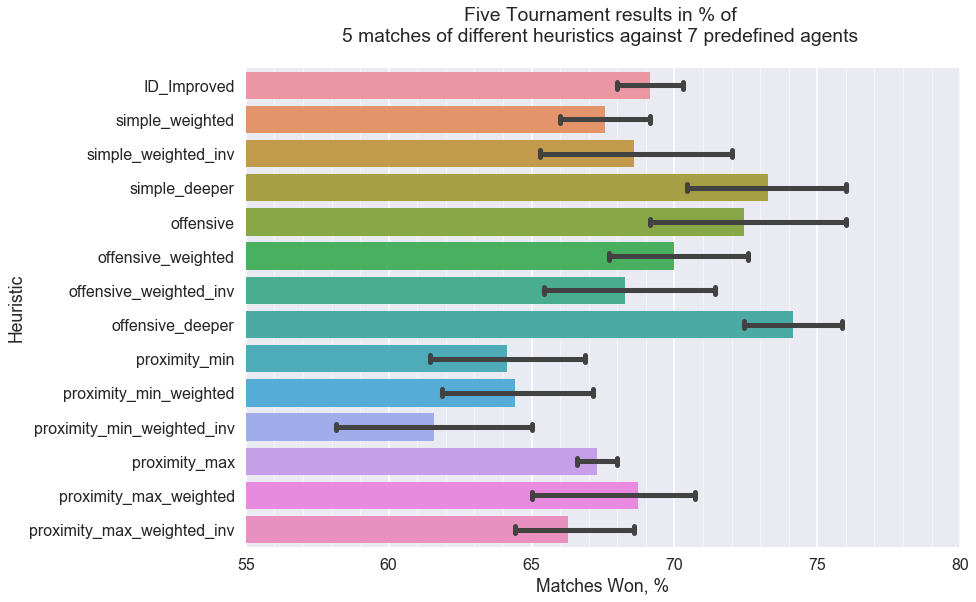

In [33]:
fig = sns.barplot(data=df, capsize=.2, orient="h")
plt.xlim(55, 80)
fig.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.grid(b=True, which='minor', color='w', linewidth=0.5)
plt.title("Five Tournament results in % of \n5 matches of different heuristics against 7 predefined agents \n")
plt.xlabel("Matches Won, %")
plt.ylabel("Heuristic")